# Download the data

In [3]:
import os
import tarfile
import urllib
Download_root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
Data_path = os.path.join("datasets","housing")
Data_url = Download_root + "datasets/housing/housing.tgz"

#main function body
def fetch_data (data_url = Data_url, data_path = Data_path):
    print(f"the data url is {data_url} and the data path is {data_path}")
    os.makedirs(data_path, exist_ok= True)
    tgz_path = os.path.join(data_path,"housing.tgz")
    urllib.request.urlretrieve(data_url,tgz_path)
    Data_tgz = tarfile.open(tgz_path)
    Data_tgz.extractall(path = data_path)
    Data_tgz.close()
    print("Data loaded sucessfully!")
    
fetch_data()
        
    

the data url is https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz and the data path is datasets\housing
Data loaded sucessfully!


# Loading the data

In [4]:
import pandas as pd
def load_dataset(data_path = Data_path):
    csv_path = os.path.join(data_path,"housing.csv")
    return pd.read_csv(csv_path)
load_dataset().head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Exploring the Data 

In [5]:
housing_dataset = load_dataset()
housing_dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing_dataset.shape

(20640, 10)

In [8]:
housing_dataset["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
housing_dataset["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# Plotting the Data

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

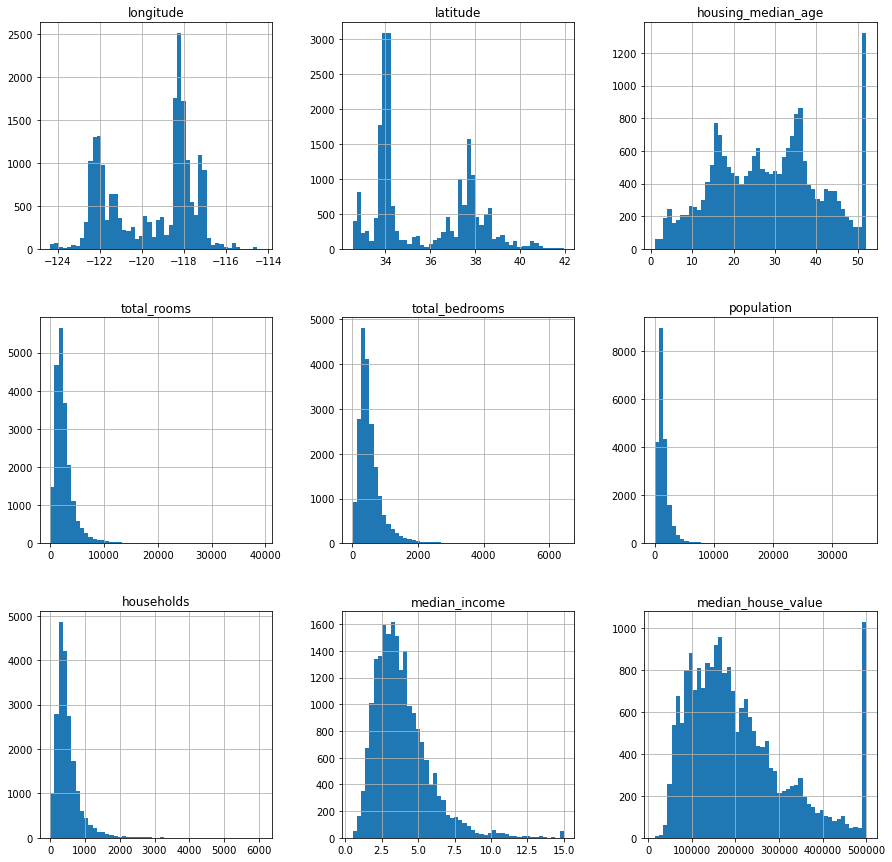

In [11]:
housing_dataset.hist(bins = 50,figsize = (15,15))
plt.show()

## Prepping the Data

Classic train split methodologie (do not work with an updated dataset --> be careful with model deploiement)

In [12]:
#first approach : function construction
import numpy as np
def split_train_test(data,test_ratio, seed=42):
    np.random.seed(seed)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    test_set = data.iloc[test_indices]
    train_set = data.iloc[train_indices]
    return train_set,test_set

In [13]:
train_set,test_set = split_train_test(housing_dataset,0.2)

In [14]:
#second approach: hashing an id for each entry
from zlib import crc32
#returns true or false
def test_set_check(identifier,test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio*(2**32)
def split_train_test_by_id(data,test_ratio,id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_,test_ratio))
    test_set = data.loc[in_test_set]
    train_set = data.loc[~in_test_set]
    return train_set, test_set

We need to create a unique id for the dataset

In [15]:
np.random.seed(42)
random_number = np.random.randint(1000,10000)
housing_dataset['id'] = housing_dataset["longitude"]*random_number + housing_dataset["latitude"]+ housing_dataset["households"]

In [16]:
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-1010678.22
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-1009583.54
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-1010709.95
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-1010750.65
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-1010710.65


In [17]:
train_set,test_set = split_train_test_by_id(housing_dataset,0.2,"id")

In [18]:
train_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-1010678.22
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-1010709.95
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-1010750.65
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-1010710.65
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY,-1010776.65
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,-1010455.66
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-1010457.36
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY,-1010255.66
10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-1010650.35
11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-1010318.35


In [19]:
test_set.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-1009583.54
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY,-1010322.66
17,-122.27,37.85,52.0,1228.0,293.0,648.0,303.0,2.1202,155500.0,NEAR BAY,-1010832.05
23,-122.27,37.84,52.0,1688.0,337.0,853.0,325.0,2.1806,99700.0,NEAR BAY,-1010810.06
25,-122.28,37.85,41.0,535.0,123.0,317.0,119.0,2.4038,107500.0,NEAR BAY,-1011098.75
26,-122.28,37.85,49.0,1130.0,244.0,607.0,239.0,2.4597,93800.0,NEAR BAY,-1010978.75
28,-122.28,37.84,50.0,2082.0,492.0,1131.0,473.0,1.6424,108900.0,NEAR BAY,-1010744.76
42,-122.26,37.84,49.0,713.0,202.0,462.0,189.0,1.0250,118800.0,NEAR BAY,-1010863.36
47,-122.27,37.82,43.0,1007.0,312.0,558.0,253.0,1.7348,137500.0,NEAR BAY,-1010882.08
57,-122.28,37.82,52.0,1489.0,335.0,728.0,244.0,0.8172,85300.0,NEAR BAY,-1010973.78


## Using Scikit-learn

In [20]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing_dataset,test_size = 0.2, random_state = 42)

Stratified sampling

In [21]:
housing_dataset["income_cat"] = pd.cut(housing_dataset["median_income"], bins = [0. , 1.5, 3, 4.5, 6 ,np.inf], labels = np.arange(1,6))

<AxesSubplot:>

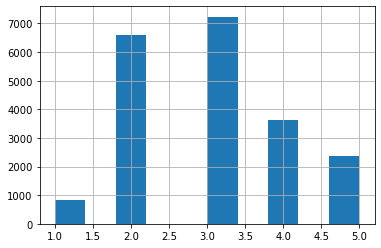

In [22]:
housing_dataset["income_cat"].hist()

In [23]:
housing_dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-1010678.22,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-1009583.54,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-1010709.95,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-1010750.65,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-1010710.65,3


In [24]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index,test_index in split.split(housing_dataset,housing_dataset["income_cat"]):
    print(train_index,test_index)
    strat_train_set = housing_dataset.loc[train_index]
    strat_test_set = housing_dataset.loc[test_index]

[17606 18632 14650 ... 13908 11159 15775] [ 5241 10970 20351 ...  4019 12107  2398]


In [25]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis = 1, inplace = True)

## Data Exploration 

In [26]:
# making a dummy set
housing = strat_train_set.copy()

<Figure size 432x288 with 0 Axes>

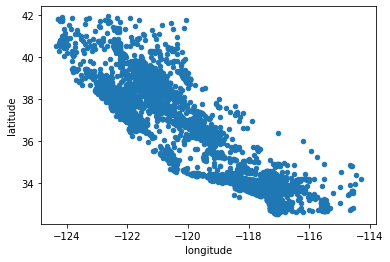

<Figure size 432x288 with 0 Axes>

In [27]:
housing.plot(kind = "scatter", x = 'longitude', y = 'latitude')
plt.figure()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

<Figure size 432x288 with 0 Axes>

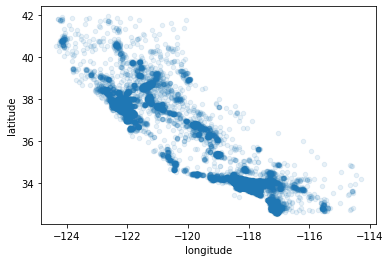

In [28]:
plt.figure()
housing.plot(kind = "scatter",x = 'longitude', y = 'latitude', alpha = 0.1 )

<Figure size 432x288 with 0 Axes>

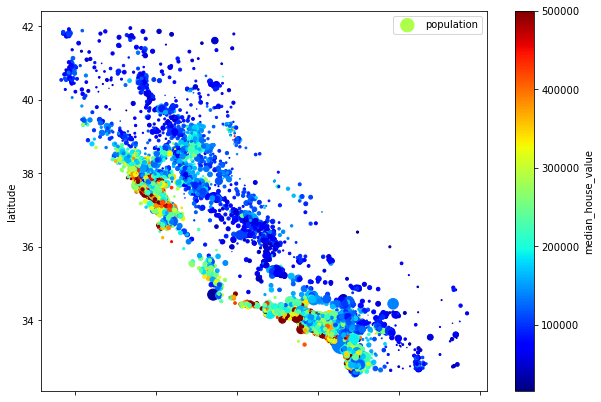

In [29]:
plt.figure()
housing.plot(kind = "scatter", x = 'longitude', y = 'latitude', s = housing["population"]/100, label = "population", c = "median_house_value", cmap= plt.get_cmap("jet"),colorbar = True, figsize= (10,7))
plt.legend()

## Correlation between features

In [30]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
id                   -0.045915
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

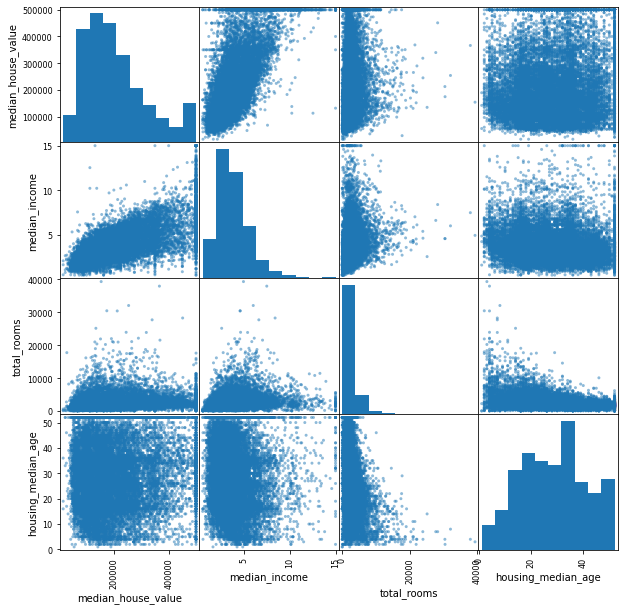

In [31]:
# scatter matrix
from pandas.plotting import scatter_matrix
target_attributes = ["median_house_value","median_income","total_rooms", "housing_median_age"]
scatter_matrix(housing[target_attributes], figsize=(10,10))

<AxesSubplot:xlabel=' Median Income', ylabel='Median House Value'>

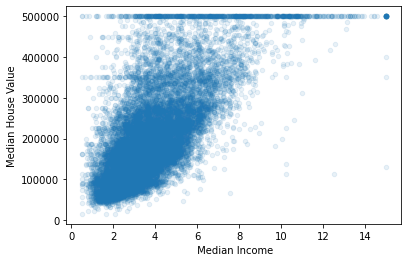

In [32]:
housing.plot(kind = "scatter", x = "median_income", y ="median_house_value", alpha = 0.1, xlabel = " Median Income", ylabel = "Median House Value")

In [33]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["bedrooms_per_household"]= housing["total_bedrooms"]/housing["households"]

In [34]:
corr_matrix1 = housing.corr()
corr_matrix1["median_house_value"].sort_values(ascending = False)

median_house_value        1.000000
median_income             0.687160
rooms_per_household       0.146285
total_rooms               0.135097
housing_median_age        0.114110
households                0.064506
total_bedrooms            0.047689
population               -0.026920
bedrooms_per_household   -0.043343
id                       -0.045915
longitude                -0.047432
latitude                 -0.142724
bedrooms_per_room        -0.259984
Name: median_house_value, dtype: float64

In [35]:
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [36]:
housing[housing["total_bedrooms"].isnull()]
housing[housing.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,id
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN,-976844.93
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN,-973941.19
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN,-1008268.55
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND,-969645.95
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN,-1014029.82
...,...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,NaN,1886.0,769.0,2.6036,<1H OCEAN,-977372.35
4691,-118.37,34.07,50.0,2519.0,NaN,1117.0,516.0,4.3667,<1H OCEAN,-978369.83
6052,-117.76,34.04,34.0,1914.0,NaN,1564.0,328.0,2.8347,INLAND,-973513.16
17198,-119.75,34.45,6.0,2864.0,NaN,1404.0,603.0,5.5073,NEAR OCEAN,-989695.05


## Scikit-learn's handy imputer for filling missing values

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= "median")
housing_only_num = housing.drop("ocean_proximity", axis = 1)
#alternatively
housing_num = housing.select_dtypes(include = [np.number])

In [38]:
imputer.fit(housing_only_num)
imputer.transform(housing_only_num)

array([[-1.21890000e+02,  3.72900000e+01,  3.80000000e+01, ...,
         3.39000000e+02,  2.70420000e+00, -1.00765401e+06],
       [-1.21930000e+02,  3.70500000e+01,  1.40000000e+01, ...,
         1.13000000e+02,  6.42140000e+00, -1.00821105e+06],
       [-1.17200000e+02,  3.27700000e+01,  3.10000000e+01, ...,
         4.62000000e+02,  2.86210000e+00, -9.68749230e+05],
       ...,
       [-1.16400000e+02,  3.40900000e+01,  9.00000000e+00, ...,
         7.65000000e+02,  3.27230000e+00, -9.61828910e+05],
       [-1.18010000e+02,  3.38200000e+01,  3.10000000e+01, ...,
         3.56000000e+02,  4.06250000e+00, -9.75552880e+05],
       [-1.22450000e+02,  3.77700000e+01,  5.20000000e+01, ...,
         6.39000000e+02,  3.57500000e+00, -1.01198473e+06]])

In [39]:
imputer.statistics_

array([-1.1851000e+02,  3.4260000e+01,  2.9000000e+01,  2.1195000e+03,
        4.3300000e+02,  1.1640000e+03,  4.0800000e+02,  3.5409000e+00,
       -9.7951943e+05])

In [40]:
housing_only_num.median()

longitude               -118.5100
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2119.5000
total_bedrooms           433.0000
population              1164.0000
households               408.0000
median_income              3.5409
id                   -979519.4300
dtype: float64

## Revert back to a pandas DataFrame

In [41]:
housing_filled = pd.DataFrame(imputer.transform(housing_only_num), columns = housing_only_num.columns, index = housing_only_num.index)
housing_filled.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,id
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,-1007654.01
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,-1008211.05
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,-968749.23
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,-988785.39
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,-979242.07


In [42]:
housing_filled.loc[housing[housing.isnull().any(axis=1)].index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,id
4629,-118.30,34.07,18.0,3759.0,433.0,3296.0,1462.0,2.2708,-976844.93
6068,-117.86,34.01,16.0,4632.0,433.0,3038.0,727.0,5.1762,-973941.19
17923,-121.97,37.35,30.0,1955.0,433.0,999.0,386.0,4.6328,-1008268.55
13656,-117.30,34.05,6.0,2155.0,433.0,1039.0,391.0,1.6675,-969645.95
19252,-122.79,38.48,7.0,6837.0,433.0,3468.0,1405.0,3.1662,-1014029.82
...,...,...,...,...,...,...,...,...,...
3376,-118.28,34.25,29.0,2559.0,433.0,1886.0,769.0,2.6036,-977372.35
4691,-118.37,34.07,50.0,2519.0,433.0,1117.0,516.0,4.3667,-978369.83
6052,-117.76,34.04,34.0,1914.0,433.0,1564.0,328.0,2.8347,-973513.16
17198,-119.75,34.45,6.0,2864.0,433.0,1404.0,603.0,5.5073,-989695.05


In [43]:
housing_cat = housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [44]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_encoded = cat_encoder.fit_transform(housing_cat)
housing_cat_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [45]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,id
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,-1007654.01
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,-1008211.05
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,-968749.23
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,-988785.39
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,-979242.07


In [47]:
housing.values

array([[-121.89, 37.29, 38.0, ..., 2.7042, '<1H OCEAN', -1007654.01],
       [-121.93, 37.05, 14.0, ..., 6.4214, '<1H OCEAN', -1008211.05],
       [-117.2, 32.77, 31.0, ..., 2.8621, 'NEAR OCEAN', -968749.23],
       ...,
       [-116.4, 34.09, 9.0, ..., 3.2723, 'INLAND', -961828.91],
       [-118.01, 33.82, 31.0, ..., 4.0625, '<1H OCEAN',
        -975552.8800000001],
       [-122.45, 37.77, 52.0, ..., 3.575, 'NEAR BAY', -1011984.73]],
      dtype=object)

## Custom transformers

In [48]:
from sklearn.base import BaseEstimator, TransformerMixin
col_names = ["total_rooms", "total_bedrooms", "population", "households"]
room_ix,bedroom_ix,population_ix,households_ix = [housing.columns.get_loc(c) for c in col_names]
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedroom_per_room = True):
        self.add_bedroom_per_room = add_bedroom_per_room
    def fit(self,X, y= None):
        return self
    def transform(self,X):
        rooms_per_household = X[:,room_ix]/X[:,households_ix]
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedroom_per_room:
            bedroom_per_room = X[:, bedroom_ix]/X[:, room_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedroom_per_room]
        else :
            return np.c_[X,rooms_per_household,population_per_household]
attr_adder = CombinedAttributesAdder(add_bedroom_per_room= False)
housing_extra_attr = attr_adder.transform(housing.values)
            
housing_extra_attr  

array([[-121.89, 37.29, 38.0, ..., -1007654.01, 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., -1008211.05, 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., -968749.23, 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., -961828.91, 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., -975552.8800000001, 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., -1011984.73, 4.843505477308295,
        1.9859154929577465]], dtype=object)

## Pipelines

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy= "median")),
    ('attribute_adder', CombinedAttributesAdder()),
    ("std_scaler",StandardScaler()),
])

In [50]:
housing_num_tr = num_pipeline.fit_transform(housing_only_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [51]:
list(housing_only_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'id']

## Using the ColumnTransformer method

In [52]:
from sklearn.compose import ColumnTransformer
num_attributes = list(housing_only_num)
cat_attributes = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
    ("num",num_pipeline, num_attributes),
    ("cat",OneHotEncoder(), cat_attributes),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [53]:
housing_prepared.shape

(16512, 17)

In [54]:
housing.shape

(16512, 10)

In [55]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

## Training a ML Model

Linear Regession 

Linear regression is a simple linear model,let's train it on the training set and actually find out how it performes

In [56]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

Training score

In [57]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions, squared=False)
lin_mse

68599.03417803062

Decision trees

In [58]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [59]:
from sklearn.metrics import mean_squared_error
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels,housing_predictions, squared=False)
tree_mse

0.0

## Better evaluation with k folds Cross-Validation

In [60]:
from sklearn.model_selection import cross_val_score
models = [lin_reg,tree_reg]
for model in models:
    scores = cross_val_score(model,housing_prepared,housing_labels,scoring = "neg_mean_squared_error", cv = 10)
    rmse_scores = np.sqrt(-scores)
    print(f"{model} Score is : {rmse_scores}")
    print(f"{model} mean score is : {rmse_scores.mean()}")
    print(f"{model} standard deviation is {rmse_scores.std()}")

LinearRegression() Score is : [66738.76115746 66908.86435544 70353.56467325 74740.55038713
 68041.06534583 71176.78435743 65003.56630365 68231.00555903
 71571.0482389  67537.52833375]
LinearRegression() mean score is : 69030.27387118743
LinearRegression() standard deviation is 2742.8604294898146
DecisionTreeRegressor() Score is : [69224.91802685 66798.39614214 69795.39936513 69744.92418422
 69753.08903178 74825.89747093 72128.37655923 71052.42466516
 77405.93699412 69588.90861148]
DecisionTreeRegressor() mean score is : 71031.82710510373
DecisionTreeRegressor() standard deviation is 2903.7218778918877


Lineair Regression is underfitting
Decision tree model is overfitting so badly

## Training Other Regressors

In [61]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg = AdaBoostRegressor()
ada_reg.fit(housing_prepared,housing_labels)

AdaBoostRegressor()

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
grad_boost_reg = GradientBoostingRegressor()
grad_boost_reg.fit(housing_prepared,housing_labels)

GradientBoostingRegressor()

In [63]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state= 42)
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor(random_state=42)

In [64]:
from sklearn.svm import SVR
svm_reg = SVR(kernel = "linear")
svm_reg.fit(housing_prepared,housing_labels)

SVR(kernel='linear')

## Training error

In [65]:
from sklearn.metrics import mean_squared_error
models = [ada_reg,grad_boost_reg,forest_reg,svm_reg]
for model in models:
    predicitons = model.predict(housing_prepared)
    rmse = mean_squared_error(housing_labels,predicitons, squared=False)
    print(f"{model} score is : {rmse}")

AdaBoostRegressor() score is : 76835.8704280093
GradientBoostingRegressor() score is : 50972.60491136031
RandomForestRegressor(random_state=42) score is : 18605.139140922878
SVR(kernel='linear') score is : 111051.184533547


In [66]:
from sklearn.model_selection import cross_val_score
models = [ada_reg,grad_boost_reg,forest_reg,svm_reg]
for model in models:
    scores = cross_val_score(model,housing_prepared,housing_labels,scoring = "neg_mean_squared_error", cv = 10)
    rmse_scores = np.sqrt(-scores)
    print(f"{model} Score is : {rmse_scores}")
    print(f"{model} mean score is : {rmse_scores.mean()}")
    print(f"{model} standard deviation is {rmse_scores.std()}")

AdaBoostRegressor() Score is : [78875.55590175 83239.19415184 89880.82181111 92698.17327155
 82492.35715531 80490.67035194 71740.93522531 80097.11657708
 88208.61870368 83767.05583717]
AdaBoostRegressor() mean score is : 83149.04989867551
AdaBoostRegressor() standard deviation is 5724.614918104269
GradientBoostingRegressor() Score is : [51717.68697105 50172.76609919 52603.08124515 55407.13047138
 53251.64175191 56066.84084433 50824.81604656 50787.24985261
 56950.89377044 53970.5540946 ]
GradientBoostingRegressor() mean score is : 53175.266114721555
GradientBoostingRegressor() standard deviation is 2256.7737889811006
RandomForestRegressor(random_state=42) Score is : [49441.70227121 47407.16118639 50038.4036152  52248.55291609
 49419.84514967 53221.75085028 48465.7310383  47741.79847606
 53322.81281011 49993.11070194]
RandomForestRegressor(random_state=42) mean score is : 50130.08690152475
RandomForestRegressor(random_state=42) standard deviation is 2028.141871187874
SVR(kernel='linear')

Gradient boosting and random forests are by far the best estimators,hence, we will keep them and try to fine tune their parametres

## Model Fine-tuning

## Grid Search

In [67]:
#Random Forest

from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators' : np.arange(1,30,10),'bootstrap': [True,False],'max_features' : np.arange(2,10,2)}
]
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'bootstrap': [True, False],
                          'max_features': array([2, 4, 6, 8]),
                          'n_estimators': array([ 1, 11, 21])}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 21}

In [69]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=6, n_estimators=21,
                      random_state=42)

## Randomized Search

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators':randint(low =1, high = 200),
    'max_features' : randint(low =1, high = 8)
}
forest_reg_rnd = RandomForestRegressor(random_state = 42)
rnd_search = RandomizedSearchCV(forest_reg_rnd,param_distributions= param_dist,n_iter = 20, cv=5,random_state = 42)
rnd_search.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020FEAC0E0A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020FEAC0E280>},
                   random_state=42)

In [140]:
rnd_search.best_params_

{'max_features': 7, 'n_estimators': 190}

In [72]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=190, random_state=42)

In [73]:
#fine tuning grad boosting 
from sklearn.model_selection import GridSearchCV
Grad_boost_param_grid ={
    "learning_rate" : np.arange(0.1,2,0.2),
    "n_estimators" : np.arange(10,200,20),
    "max_features" : np.arange(2,10,2)
}
grad_boost_reg = GradientBoostingRegressor(random_state=42)
gradB_gridsearch = GridSearchCV(grad_boost_reg,Grad_boost_param_grid,scoring="neg_mean_squared_error",return_train_score=True)
gradB_gridsearch.fit(housing_prepared,housing_labels)

GridSearchCV(estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'max_features': array([2, 4, 6, 8]),
                         'n_estimators': array([ 10,  30,  50,  70,  90, 110, 130, 150, 170, 190])},
             return_train_score=True, scoring='neg_mean_squared_error')

In [74]:
gradB_gridsearch.best_estimator_

GradientBoostingRegressor(learning_rate=0.30000000000000004, max_features=8,
                          n_estimators=190, random_state=42)

In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators':randint(low =1, high = 200),
    'max_features' : randint(low =1, high = 8),
    'learning_rate' : np.arange(0.1,2,0.2)
}
grad_boost_reg_rand = GradientBoostingRegressor(random_state=42)
gradB_randsearch = RandomizedSearchCV(grad_boost_reg_rand,param_distributions=param_dist,n_iter = 20, cv=5,random_state = 42)
gradB_randsearch.fit(housing_prepared,housing_labels)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'learning_rate': array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020F9EFFADF0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020F9EFFA640>},
                   random_state=42)

In [76]:
gradB_randsearch.best_estimator_

GradientBoostingRegressor(learning_rate=0.30000000000000004, max_features=4,
                          n_estimators=89, random_state=42)

In [77]:
gradB_randsearch.best_estimator_.feature_importances_

array([5.36473712e-02, 8.59593499e-02, 2.02547237e-02, 2.38407150e-03,
       6.46019681e-03, 2.55293710e-03, 2.67003988e-03, 2.08217514e-01,
       5.90388218e-02, 6.43110691e-02, 1.38412424e-01, 1.53696291e-01,
       2.66257620e-02, 1.65162279e-01, 7.55194957e-05, 1.90751985e-03,
       8.62411020e-03])

In [78]:
gradB_gridsearch.best_estimator_.feature_importances_

array([5.47442893e-02, 5.56078368e-02, 2.89952574e-02, 3.51575665e-03,
       4.18504138e-03, 2.41605988e-03, 4.27313897e-03, 3.16745117e-01,
       2.98286041e-02, 5.61289861e-02, 1.12180758e-01, 9.10020862e-02,
       1.43478211e-03, 2.32170889e-01, 3.52906422e-05, 3.20406391e-03,
       3.53204212e-03])

In [79]:
final_model = gradB_gridsearch.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [80]:
final_rmse 

47074.49407809361

In [81]:
final_model = gradB_randsearch.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [82]:
final_rmse 

51050.742733431354

In [83]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [84]:
final_rmse 

46384.468993378636

In [85]:
final_model = rnd_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [86]:
final_rmse

45977.2026565732

Random Forests preformed the best for this dataset!

In [87]:
#95% confidence interval for the test RMSE
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions-y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1, loc = squared_errors.mean(), scale = stats.sem(squared_errors)))

array([44008.39707508, 47865.09495582])

## EXTRA STEPS

In [88]:
full_pipeline_with_predictor = Pipeline([
    ("preparation", full_pipeline),
    ("random_forest", final_model)
])
full_pipeline_with_predictor.fit(housing,housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribute_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                  

## Scipy distributions

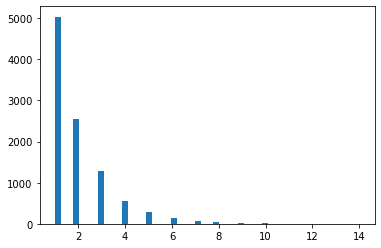

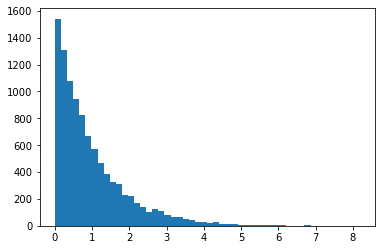

In [89]:
from scipy.stats import geom,expon
geom_distrib=geom(0.5).rvs(10000)
expon_distrib=expon(scale=1).rvs(10000, random_state=42)
plt.hist(geom_distrib, bins=50)
plt.show()
plt.hist(expon_distrib,bins = 50)
plt.show()

In [90]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'kernel' : ['linear'], 'C' : [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
    {'kernel' : ['rbf'], 'C' : [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma' : [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]
svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv =5, scoring = 'neg_mean_squared_error', verbose =2)
grid_search.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  13.6s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.8s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.9s
[CV] END ..............................C=10.0, kernel=linear; total time=   9.8s
[CV] END ..............................C=10.0, kernel=linear; total time=  13.1s
[CV] END ..............................C=30.0, kernel=linear; total time=  15.2s
[CV] END ..............................C=30.0, kernel=linear; total time=  14.9s
[CV] END ..............................C=30.0, kernel=linear; total time=  15.5s
[CV] END ..............................C=30.0, kernel=linear; total time=  15.2s
[CV] END ..............................C=30.0, kernel=linear; total time=  14.8s
[CV] END .............................C=100.0, kernel=linear; total time=  15.1s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [91]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
param_dist=[
    {"kernel": ['linear','rbf'],
    'C': reciprocal(20,20000),
    'gamma' : expon(scale = 1)}
]
svm_reg = SVR()
rnd_search1 = RandomizedSearchCV(svm_reg,param_distributions= param_dist,n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=2, random_state=42)
rnd_search1.fit(housing_prepared,housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   7.2s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   7.3s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   7.2s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   7.4s
[CV] END C=265.8583788632432, gamma=3.010121430917521, kernel=linear; total time=   7.3s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  13.0s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  12.9s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  12.7s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  12.6s
[CV] END C=4366.193678104918, gamma=0.9084469696321253, kernel=rbf; total time=  12.7s
[CV] END C=58.750769152656574, gamma=0.059838768608680676,

RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=50,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020F9F11F310>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020F84F60670>,
                                         'kernel': ['linear', 'rbf']}],
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [92]:
reciprocal.rvs(20,2000)

59.80303483382728

In [93]:
negative_mse = rnd_search1.best_score_
rmse = np.sqrt(-negative_mse)
rmse



58700.004783058794

In [94]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse


70363.88278016938

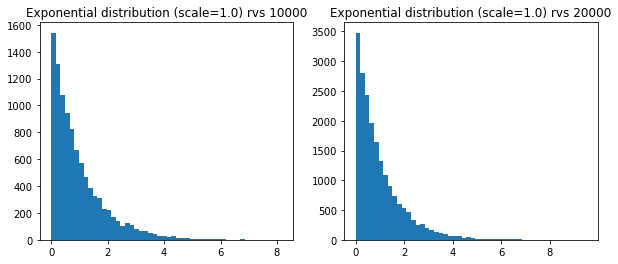

In [95]:
expon_distrib1 = expon(scale=1.)
samples1 = expon_distrib1.rvs(size=10000, random_state=42)
samples2 = expon_distrib1.rvs(size=20000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0) rvs 10000")
plt.hist(samples1, bins=50)
plt.subplot(122)
plt.title("Exponential distribution (scale=1.0) rvs 20000")
plt.hist(samples2, bins=50)
plt.show()

In [107]:
features_importance =rnd_search.best_estimator_.feature_importances_
features_importance

array([5.60548350e-02, 6.47782550e-02, 3.80742621e-02, 1.50756974e-02,
       1.40661184e-02, 1.46820010e-02, 1.35903126e-02, 3.26238294e-01,
       4.84182217e-02, 5.68041212e-02, 1.05437603e-01, 7.35188908e-02,
       1.15130616e-02, 1.53962522e-01, 7.01297281e-05, 3.26209534e-03,
       4.45357905e-03])

In [108]:
np.argpartition(np.array(features_importance), -5)

array([12, 16,  2,  3,  4,  5,  6, 15, 14,  8,  9,  0,  1, 11, 10,  7, 13],
      dtype=int64)

In [112]:
from sklearn.base import BaseEstimator,TransformerMixin

def indices_of_top_k(arr,k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator,TransformerMixin):
    def __init__(self, feature_importances,k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self,X,y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances,self.k)
        return self
    def transform(self,X):
        return X[:,self.feature_indices_]
            

In [110]:
preparation_and_feature_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(features_importance,k=5))
])

In [120]:
housing_prepared_top_k_features = preparation_and_feature_pipeline.fit_transform(housing)
housing_prepared_top_k_features[0:3]

array([[ 0.77194962, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [ 0.6596948 ,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [-1.34218285, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ]])

In [128]:
housing_prepared[0:3, indices_of_top_k(features_importance,k=5)]

array([[ 0.77194962, -0.61493744, -0.08649871,  0.15531753,  0.        ],
       [ 0.6596948 ,  1.33645936, -0.03353391, -0.83628902,  0.        ],
       [-1.34218285, -0.5320456 , -0.09240499,  0.4222004 ,  0.        ]])

In [144]:
k=10

## Pipeline Full data prep + prediction

In [145]:
prepare_select_predict= Pipeline([
        ('preparation',full_pipeline),
    ('selection',TopFeatureSelector(features_importance,k)),
    ('predict',rnd_search.best_estimator_)
])     

In [143]:
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=190, random_state=42)

In [146]:
prepare_select_predict.fit(housing,housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribute_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                  

In [151]:
some_data=housing.iloc[:4]
some_labels = housing_labels.iloc[:4]
print("predictons:\t", prepare_select_predict.predict(some_data))
print("Labels :\t",list(some_labels))

predictons:	 [267491.05263158 328183.68947368 219350.52631579  51942.63157895]
Labels :	 [286600.0, 340600.0, 196900.0, 46300.0]


In [152]:
full_pipeline.named_transformers_["cat"].handle_unkown = 'ignore'
param_grid=[{
    'preparation__num__imputer__strategy': ['mean','median','most frequent'],
    'selection__k': list(range(7,len(features_importance)+1))
}]
grid_search_prep =GridSearchCV(prepare_select_predict,param_grid,cv=5,scoring="neg_mean_squared_error",verbose=2)
grid_search_prep.fit(housing,housing_labels)

Fitting 5 folds for each of 33 candidates, totalling 165 fits
[CV] END preparation__num__imputer__strategy=mean, selection__k=7; total time=   9.8s
[CV] END preparation__num__imputer__strategy=mean, selection__k=7; total time=  10.4s
[CV] END preparation__num__imputer__strategy=mean, selection__k=7; total time=  11.4s
[CV] END preparation__num__imputer__strategy=mean, selection__k=7; total time=  10.0s
[CV] END preparation__num__imputer__strategy=mean, selection__k=7; total time=  10.2s
[CV] END preparation__num__imputer__strategy=mean, selection__k=8; total time=  10.9s
[CV] END preparation__num__imputer__strategy=mean, selection__k=8; total time=  10.7s
[CV] END preparation__num__imputer__strategy=mean, selection__k=8; total time=  10.3s
[CV] END preparation__num__imputer__strategy=mean, selection__k=8; total time=  10.2s
[CV] END preparation__num__imputer__strategy=mean, selection__k=8; total time=  10.3s
[CV] END preparation__num__imputer__strategy=mean, selection__k=9; total time=

C:\Users\bouaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bouaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bouaa\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\bouaa\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\bouaa\anaconda3\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\bouaa\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

[CV] END preparation__num__imputer__strategy=most frequent, selection__k=13; total time=   0.0s
[CV] END preparation__num__imputer__strategy=most frequent, selection__k=13; total time=   0.0s
[CV] END preparation__num__imputer__strategy=most frequent, selection__k=13; total time=   0.0s
[CV] END preparation__num__imputer__strategy=most frequent, selection__k=13; total time=   0.0s
[CV] END preparation__num__imputer__strategy=most frequent, selection__k=14; total time=   0.0s
[CV] END preparation__num__imputer__strategy=most frequent, selection__k=14; total time=   0.0s
[CV] END preparation__num__imputer__strategy=most frequent, selection__k=14; total time=   0.0s
[CV] END preparation__num__imputer__strategy=most frequent, selection__k=14; total time=   0.0s
[CV] END preparation__num__imputer__strategy=most frequent, selection__k=14; total time=   0.0s
[CV] END preparation__num__imputer__strategy=most frequent, selection__k=15; total time=   0.0s
[CV] END preparation__num__imputer__stra

C:\Users\bouaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bouaa\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bouaa\anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\Users\bouaa\anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\bouaa\anaconda3\lib\site-packages\joblib\memory.py", line 349, in __call__
    return self.func(*args, **kwargs)
  File "C:\Users\bouaa\anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X, y, **fit_params)
  File 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preparation',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribute_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
     

In [153]:
grid_search_prep.best_params_

{'preparation__num__imputer__strategy': 'median', 'selection__k': 17}